# Dataset

In [8]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Nama file CSV di dalam dataset
file_path = "heart.csv"

# Load dataset sebagai pandas dataframe
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fedesoriano/heart-failure-prediction",
    file_path
)

<ipython-input-8-dcb3b8942887>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


### Pemuatan Dataset dari Kaggle
Dataset yang digunakan dalam proyek ini adalah "Heart Failure Prediction" oleh Fedesoriano, yang bersumber dari Kaggle. Kode di atas menggunakan library `kagglehub` untuk mengunduh dan memuat dataset `heart.csv` langsung ke dalam sebuah DataFrame pandas bernama `df`.

link https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Library

In [9]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


### Impor Library
Cell ini berisi semua impor library Python yang akan digunakan dalam keseluruhan proyek. Ini termasuk `pandas` untuk manipulasi data, `matplotlib` dan `seaborn` untuk visualisasi, serta berbagai modul dari `sklearn` untuk pra-pemrosesan data, pemodelan machine learning, dan evaluasi model.

# Data Load

In [10]:
# Tampilkan 5 baris pertama
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


### Menampilkan Data Awal
Untuk mendapatkan gambaran awal mengenai isi dataset, lima baris pertama dari DataFrame `df` ditampilkan menggunakan `df.head()`. Ini membantu dalam memahami struktur data dan jenis nilai yang ada pada setiap fitur.

# Data Understanding

### Informasi Dasar Dataset
Tahap Data Understanding dimulai dengan mengeksplorasi karakteristik dasar dataset. Ini melibatkan pengecekan jumlah baris dan kolom, tipe data masing-masing kolom, dan ada atau tidaknya nilai yang hilang (missing values).

In [11]:
# Cek struktur data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


#### Output `df.info()`
Output dari `df.info()` di atas menunjukkan bahwa dataset terdiri dari 918 entri (baris) dan 12 kolom. Tidak terdapat missing values pada dataset ini, karena setiap kolom memiliki 918 data non-null. Tipe data terdiri dari `int64`, `float64`, dan `object`. Kolom dengan tipe `object` akan diperlakukan sebagai fitur kategorikal.

### Statistik Deskriptif
Untuk fitur-fitur numerik, statistik deskriptif seperti mean, median (50%), standar deviasi, nilai minimum, dan maksimum akan ditampilkan menggunakan `df.describe()`. Ini memberikan wawasan mengenai distribusi dan skala data numerik.

In [12]:
# Statistik deskriptif
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


#### Output `df.describe()`
Statistik deskriptif menunjukkan ringkasan untuk kolom-kolom numerik. Sebagai contoh, rata-rata (`mean`) usia pasien adalah sekitar 53.5 tahun. Nilai `RestingBP` (tekanan darah istirahat) dan `Cholesterol` memiliki nilai minimum 0, yang mungkin perlu diperiksa lebih lanjut karena nilai ini tidak lazim secara fisiologis dan bisa jadi merupakan indikasi data yang perlu penanganan khusus atau merupakan representasi nilai yang hilang yang dikodekan sebagai 0.

### Distribusi Kelas Target
Penting untuk mengetahui distribusi kelas pada variabel target (`HeartDisease`). Ini akan menentukan apakah dataset  seimbang atau tidak, yang dapat memengaruhi pemilihan metrik evaluasi dan strategi pemodelan.

In [14]:
# Cek distribusi target
print(df['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


#### Output Distribusi Target
Distribusi kelas target adalah sebagai berikut:
- Kelas 1 (Sakit Jantung): 508 sampel
- Kelas 0 (Tidak Sakit Jantung): 410 sampel

Dataset ini cukup seimbang, meskipun ada sedikit lebih banyak sampel untuk kelas 'Sakit Jantung'.

# Exploratory Data Analysis (EDA)

### Analisis Korelasi Fitur Numerik
Untuk memahami hubungan linear antar fitur numerik, maka perlu membuat heatmap korelasi. Korelasi yang tinggi antar fitur dapat mengindikasikan multikolinieritas.

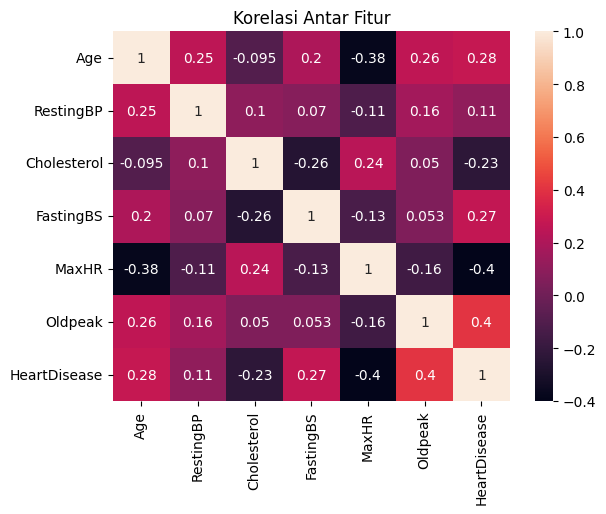

In [15]:
# Korelasi antar fitur numerik
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Korelasi Antar Fitur")
plt.show()


#### Output Heatmap Korelasi
Heatmap di atas menunjukkan matriks korelasi antar fitur numerik. Nilai yang mendekati 1 atau -1 menunjukkan korelasi linear yang kuat. Dari heatmap ini, bisa dilihat bagaimana setiap fitur numerik berkorelasi satu sama lain dan juga dengan variabel target `HeartDisease` (jika numerik). Misalnya, `Age` dan `MaxHR` memiliki korelasi tertentu dengan `HeartDisease`.

### Distribusi Usia berdasarkan Status Penyakit Jantung
Boxplot di bawah ini digunakan untuk memvisualisasikan distribusi usia pasien dikelompokkan berdasarkan status penyakit jantung (memiliki penyakit jantung atau tidak). Ini membantu untuk melihat apakah ada perbedaan rentang usia atau median usia yang signifikan antara kedua kelompok.

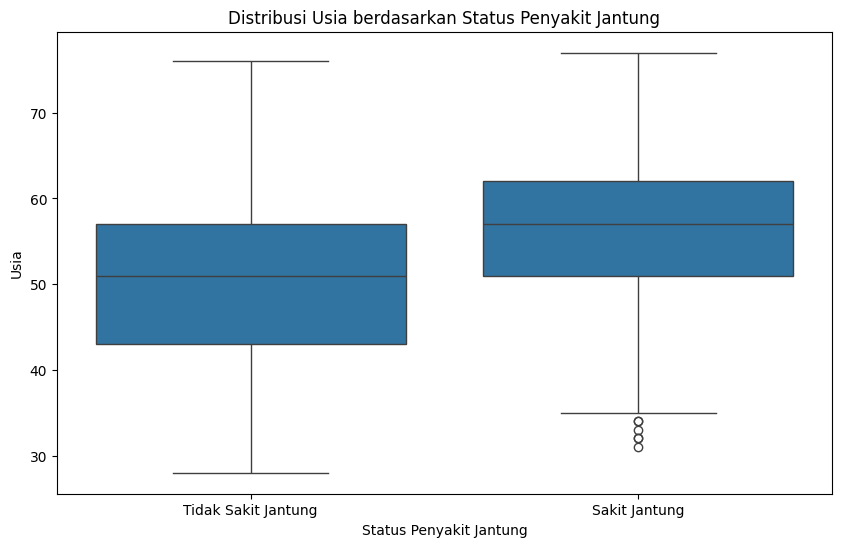

In [17]:
# Distribusi usia berdasarkan status penyakit jantung
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title("Distribusi Usia berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("Usia")
plt.show()

#### Temuan dari Boxplot Usia
Dari boxplot di atas, terlihat bahwa median usia pasien yang didiagnosis menderita penyakit jantung (Sakit Jantung) cenderung lebih tinggi dibandingkan dengan mereka yang tidak. Rentang interkuartil (IQR) untuk kelompok 'Sakit Jantung' juga tampak berada pada nilai usia yang lebih tinggi. Ini mengindikasikan bahwa usia yang lebih tua mungkin menjadi faktor risiko.

### Distribusi Kolesterol berdasarkan Status Penyakit Jantung
Visualisasi boxplot berikutnya menampilkan distribusi kadar kolesterol pasien, yang juga dikelompokkan berdasarkan status penyakit jantung. Ini bertujuan untuk mengidentifikasi apakah ada perbedaan signifikan dalam tingkat kolesterol antara pasien dengan dan tanpa penyakit jantung.

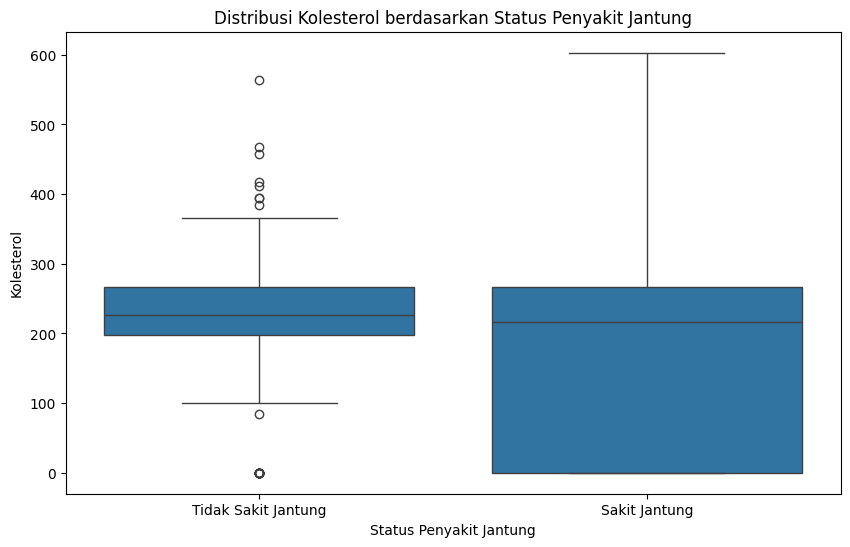

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Distribusi Kolesterol berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("Kolesterol")
plt.show()

#### Temuan dari Boxplot Kolesterol
Boxplot ini menunjukkan bahwa distribusi kolesterol untuk kedua kelompok ('Tidak Sakit Jantung' dan 'Sakit Jantung') memiliki beberapa perbedaan. Meskipun median kedua kelompok mungkin terlihat tidak terlalu jauh berbeda, terdapat sejumlah outlier (pencilan) pada kedua kelompok. Perlu dicatat bahwa terdapat nilai kolesterol 0 yang mungkin memerlukan penanganan khusus atau investigasi lebih lanjut, seperti yang terindikasi pada statistik deskriptif sebelumnya.

### Distribusi MaxHR (Detak Jantung Maksimum) berdasarkan Status Penyakit Jantung
Boxplot ini membandingkan distribusi detak jantung maksimum (MaxHR) yang dicapai oleh pasien, dikelompokkan berdasarkan status penyakit jantung mereka. Tujuannya adalah untuk melihat apakah ada pola MaxHR yang berbeda antara kedua kelompok.

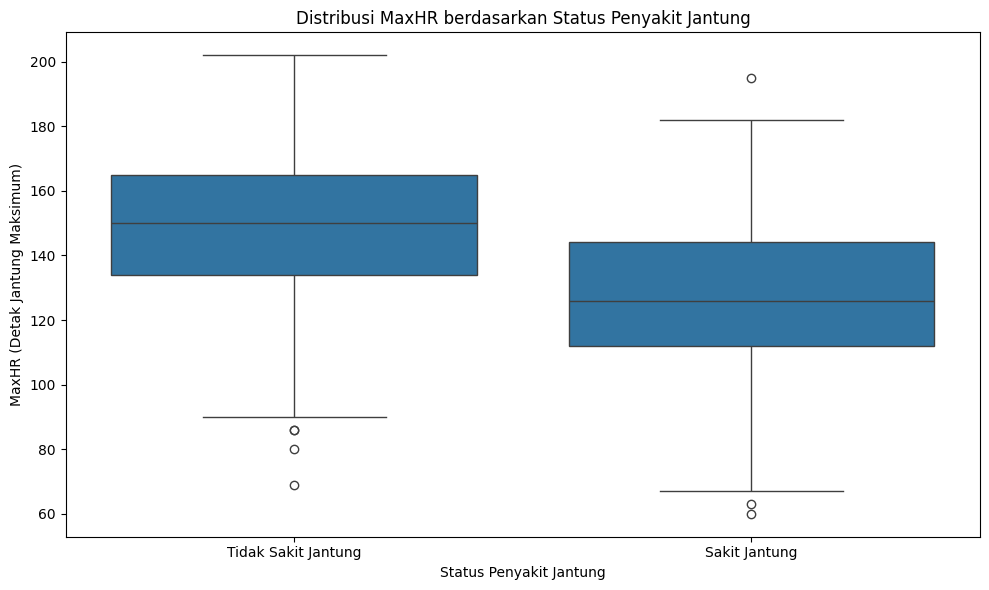

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title("Distribusi MaxHR berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("MaxHR (Detak Jantung Maksimum)")
plt.tight_layout()
plt.show()

#### Temuan dari Boxplot MaxHR
Berdasarkan boxplot MaxHR, terlihat bahwa pasien yang 'Tidak Sakit Jantung' cenderung memiliki median MaxHR yang lebih tinggi dibandingkan dengan pasien yang 'Sakit Jantung'. Ini menunjukkan bahwa kemampuan mencapai detak jantung maksimum yang lebih rendah mungkin berkaitan dengan adanya penyakit jantung.

### Distribusi Oldpeak (Depresi ST) berdasarkan Status Penyakit Jantung
Visualisasi ini menggunakan boxplot untuk menunjukkan distribusi nilai `Oldpeak` (depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat) antara pasien dengan dan tanpa penyakit jantung.

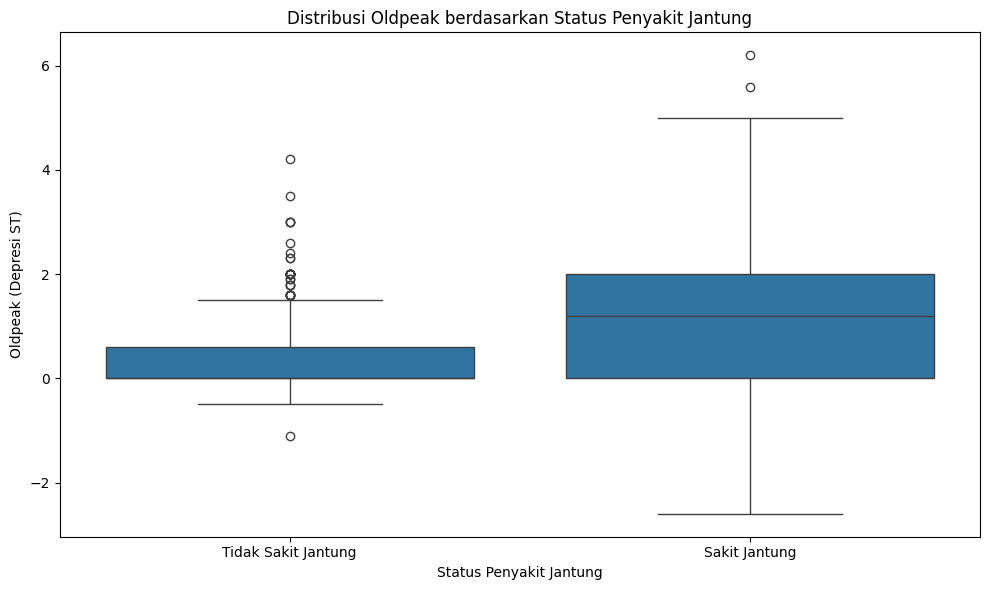

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title("Distribusi Oldpeak berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("Oldpeak (Depresi ST)")
plt.tight_layout()
plt.show()

#### Temuan dari Boxplot Oldpeak
Dari boxplot `Oldpeak`, tampak bahwa pasien dengan 'Sakit Jantung' memiliki median nilai `Oldpeak` yang lebih tinggi dibandingkan dengan mereka yang 'Tidak Sakit Jantung'. Ini mengindikasikan bahwa nilai `Oldpeak` yang lebih besar mungkin menjadi indikator penyakit jantung.

# Data Preparation

## Data Preparation
Tahap ini mencakup semua langkah yang diperlukan untuk menyiapkan data agar siap digunakan untuk melatih model machine learning. Proses ini meliputi pemisahan fitur dan target, encoding fitur kategorikal dan target, serta penskalaan fitur numerik, dan diakhiri dengan pembagian dataset menjadi data latih dan data uji.

In [21]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

### Pemisahan Fitur dan Target
Langkah pertama dalam persiapan data adalah memisahkan dataset menjadi matriks fitur (X) dan vektor target (y). `HeartDisease` adalah kolom target yang ingin di prediksi, sedangkan kolom-kolom lainnya akan menjadi fitur.

### One-Hot Encoding Fitur Kategorikal
Fitur-fitur kategorikal dalam dataset perlu diubah menjadi representasi numerik agar dapat diproses oleh algoritma machine learning. Metode yang digunakan adalah One-Hot Encoding dengan `pd.get_dummies()`. Parameter `drop_first=True` digunakan untuk menghindari multikolinieritas dengan menghapus satu kolom dari hasil encoding untuk setiap fitur kategorikal.

In [22]:
# One-hot encode fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

#### Hasil One-Hot Encoding
Setelah proses one-hot encoding, fitur-fitur kategorikal seperti `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, dan `ST_Slope` telah diubah menjadi beberapa kolom biner baru. Jumlah kolom fitur dalam X kini telah bertambah.

### Encoding Label Target
Variabel target `y` (HeartDisease), meskipun sudah numerik (0 dan 1), juga akan dipastikan tipenya sesuai untuk digunakan oleh library `sklearn` dengan menggunakan `LabelEncoder`.

In [25]:
# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#### Hasil Label Encoding
Variabel target `y` telah di-encode dan disimpan dalam `y_encoded`. Untuk dataset ini, nilai 0 dan 1 kemungkinan tetap sama, namun proses ini memastikan format yang konsisten.

### Penskalaan Fitur (Scaling)
Fitur-fitur numerik dalam dataset memiliki rentang nilai yang berbeda-beda. Untuk memastikan bahwa fitur dengan rentang nilai yang lebih besar tidak mendominasi proses pelatihan model (terutama untuk algoritma yang sensitif terhadap skala seperti KNN), perlu melakukan penskalaan. Metode yang digunakan adalah `StandardScaler` yang akan mengubah data sehingga memiliki mean 0 dan standar deviasi 1.

In [26]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Hasil Scaling
Matriks fitur `X` telah diskalakan dan hasilnya disimpan dalam `X_scaled`. Semua fitur numerik kini memiliki skala yang sebanding.

### Pembagian Dataset (Train-Test Split)
Dataset yang telah diproses akan dibagi menjadi dua bagian: data latih (training set) dan data uji (testing set). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Pembagian dilakukan dengan proporsi 80% data latih dan 20% data uji. `random_state=42` digunakan untuk memastikan hasil pembagian data konsisten setiap kali kode dijalankan.

In [27]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

#### Hasil Pembagian Dataset
Dataset kini telah terbagi menjadi `X_train`, `X_test`, `y_train`, dan `y_test`. Jumlah baris untuk data latih dan data uji akan sesuai dengan proporsi 80:20.

# Modeling

### 1. Random Forest (Default Parameters)
Model Random Forest pertama dilatih dengan parameter default, dengan `random_state=42` untuk memastikan hasil yang konsisten.

In [31]:
# ===========================
# 1. Random Forest
# ===========================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)
print("Random Forest Classification Report:")

report_target_names = ['Tidak Sakit Jantung', 'Sakit Jantung']
print(classification_report(y_test, rf_pred, target_names=report_target_names))

Random Forest Accuracy: 0.875
Random Forest Classification Report:
                     precision    recall  f1-score   support

Tidak Sakit Jantung       0.85      0.86      0.85        77
      Sakit Jantung       0.90      0.89      0.89       107

           accuracy                           0.88       184
          macro avg       0.87      0.87      0.87       184
       weighted avg       0.88      0.88      0.88       184



#### Hasil Evaluasi Random Forest (Awal)
- **Akurasi:** 0.875
- **Laporan Klasifikasi:**
  Laporan klasifikasi menunjukkan nilai presisi, recall, dan F1-score untuk masing-masing kelas.
  - Untuk kelas 'Tidak Sakit Jantung', model mencapai F1-score 0.85.
  - Untuk kelas 'Sakit Jantung', model mencapai F1-score 0.89.
  Secara keseluruhan, model Random Forest dengan parameter default menunjukkan performa yang baik dalam mengklasifikasikan kedua kelas, dengan F1-score yang relatif tinggi dan seimbang.

### 2. Decision Tree (Default Parameters)
Model Decision Tree dilatih menggunakan parameter default, dengan `random_state=42` untuk konsistensi hasil.


In [30]:
# ===========================
# 2. Decision Tree
# ===========================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)
print("Decision Tree Classification Report:")

print(classification_report(y_test, dt_pred, target_names=report_target_names))

Decision Tree Accuracy: 0.8315217391304348
Decision Tree Classification Report:
                     precision    recall  f1-score   support

Tidak Sakit Jantung       0.79      0.81      0.80        77
      Sakit Jantung       0.86      0.85      0.85       107

           accuracy                           0.83       184
          macro avg       0.83      0.83      0.83       184
       weighted avg       0.83      0.83      0.83       184



#### Hasil Evaluasi Decision Tree (Awal)
- **Akurasi:** 0.8315
- **Laporan Klasifikasi:**
  Laporan klasifikasi menunjukkan performa model Decision Tree:
  - Untuk kelas 'Tidak Sakit Jantung', F1-score yang dicapai adalah 0.80.
  - Untuk kelas 'Sakit Jantung', F1-score yang dicapai adalah 0.85.
  Model Decision Tree dengan parameter default memberikan performa yang cukup baik, meskipun sedikit di bawah Random Forest pada tahap awal ini, terutama dalam hal presisi untuk kelas 'Tidak Sakit Jantung'.

### 3. K-Nearest Neighbors (KNN) (Default Parameters)
Model K-Nearest Neighbors (KNN) dilatih dengan parameter default (umumnya, n_neighbors=5).

In [32]:
# ===========================
# 3. K-Nearest Neighbors
# ===========================
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)
print("KNN Classification Report:")

print(classification_report(y_test, knn_pred, target_names=report_target_names))

KNN Accuracy: 0.8532608695652174
KNN Classification Report:
                     precision    recall  f1-score   support

Tidak Sakit Jantung       0.80      0.87      0.83        77
      Sakit Jantung       0.90      0.84      0.87       107

           accuracy                           0.85       184
          macro avg       0.85      0.86      0.85       184
       weighted avg       0.86      0.85      0.85       184




#### Hasil Evaluasi K-Nearest Neighbors (KNN) (Awal)
- **Akurasi:** 0.8533
- **Laporan Klasifikasi:**
  Laporan klasifikasi untuk model KNN menunjukkan:
  - Untuk kelas 'Tidak Sakit Jantung', F1-score yang dicapai adalah 0.83.
  - Untuk kelas 'Sakit Jantung', F1-score yang dicapai adalah 0.87.
  Performa KNN dengan parameter default cukup baik, dengan akurasi keseluruhan yang sebanding dengan model Decision Tree pada tahap awal ini. Model ini menunjukkan recall yang baik untuk kelas 'Tidak Sakit Jantung' (0.87).

### Persiapan Data untuk Visualisasi Perbandingan Akurasi Model Awal
Setelah melatih dan mengevaluasi ketiga model dengan parameter default, langkah selanjutnya adalah membandingkan performa akurasi mereka secara visual. Untuk itu, kita perlu menyimpan nama-nama model dan nilai akurasi yang telah diperoleh dari masing-masing model ke dalam list.

In [33]:
# Simpan hasil akurasi
model_names = ['Random Forest', 'Decision Tree', 'KNN']
accuracies = [rf_acc, dt_acc, knn_acc]

#### Data Akurasi Tersimpan
Nama-nama model (`model_names`) dan akurasi masing-masing model (`accuracies`) kini telah disimpan dalam variabel. Data ini akan digunakan untuk membuat bar chart yang membandingkan akurasi awal dari model Random Forest, Decision Tree, dan KNN.

In [ ]:
models_predictions = [
    ("Random Forest", rf_pred),
    ("Decision Tree", dt_pred), 
    ("K-Nearest Neighbors (KNN)", knn_pred)
]

#### Data Prediksi Model Awal Tersimpan
Hasil prediksi dari data uji untuk model Random Forest (`rf_pred`), Decision Tree (`dt_pred`), dan K-Nearest Neighbors (`knn_pred`) beserta nama modelnya kini telah disimpan dalam list `models_predictions`. List ini akan digunakan pada cell-cell berikutnya untuk menghasilkan dan menampilkan confusion matrix serta grafik perbandingan precision, recall, dan F1-score untuk setiap model awal.

## Visualisasi Evaluasi Model (Awal)

Setelah melatih model-model awal dan menyimpan akurasinya, langkah selanjutnya adalah memvisualisasikan perbandingan performa mereka untuk mendapatkan gambaran yang lebih jelas.

### 1. Bar Chart Perbandingan Akurasi Tiap Model (Awal)
Kode di bawah ini akan membuat sebuah bar chart untuk membandingkan akurasi yang dicapai oleh masing-masing model (Random Forest, Decision Tree, dan KNN) pada data uji dengan menggunakan parameter default. Ini membantu dalam mengidentifikasi model mana yang memberikan performa akurasi terbaik pada tahap awal sebelum dilakukan hyperparameter tuning.

<ipython-input-34-d27259835100>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


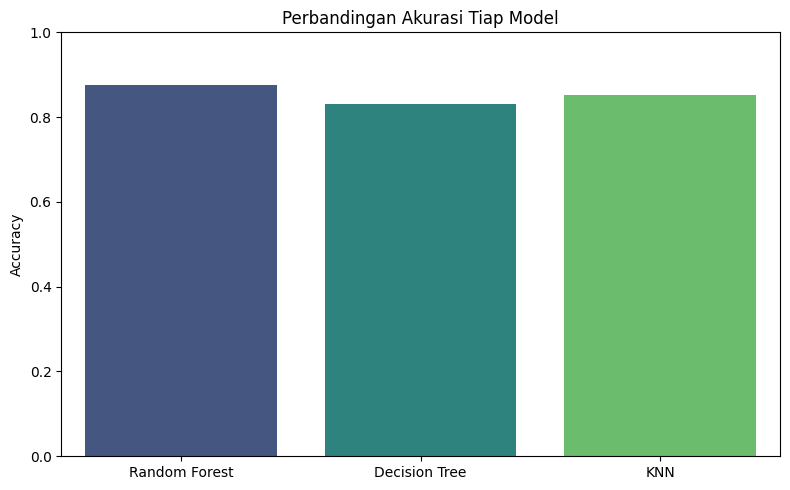

In [34]:
# === 1. Bar Chart Akurasi Tiap Model ===
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Tiap Model")
plt.tight_layout()
plt.show()

#### Hasil Bar Chart Perbandingan Akurasi
Bar chart di atas menunjukkan perbandingan akurasi dari ketiga model yang telah dilatih dengan parameter default. Dari visualisasi ini, terlihat bahwa model Random Forest memberikan akurasi tertinggi pada tahap awal, diikuti oleh KNN, dan kemudian Decision Tree.

### 2. Confusion Matrix untuk Tiap Model (Awal)
Untuk mendapatkan pemahaman yang lebih mendalam tentang performa klasifikasi setiap model, *confusion matrix*. Matriks ini akan memvisualisasikan jumlah prediksi yang benar dan salah untuk setiap kelas, yang terbagi menjadi empat kategori:
- **True Positives (TP):** Pasien yang sakit jantung dan diprediksi sakit jantung.
- **True Negatives (TN):** Pasien yang tidak sakit jantung dan diprediksi tidak sakit jantung.
- **False Positives (FP):** Pasien yang tidak sakit jantung tetapi diprediksi sakit jantung (Error Tipe I).
- **False Negatives (FN):** Pasien yang sakit jantung tetapi diprediksi tidak sakit jantung (Error Tipe II).

Kode di bawah ini akan secara iteratif membuat dan menampilkan confusion matrix untuk Random Forest, Decision Tree, dan KNN yang telah dilatih dengan parameter default.

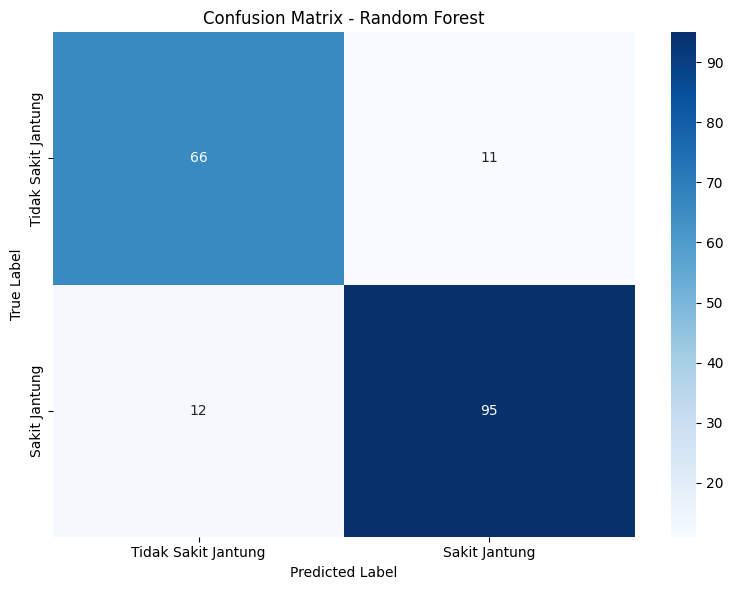

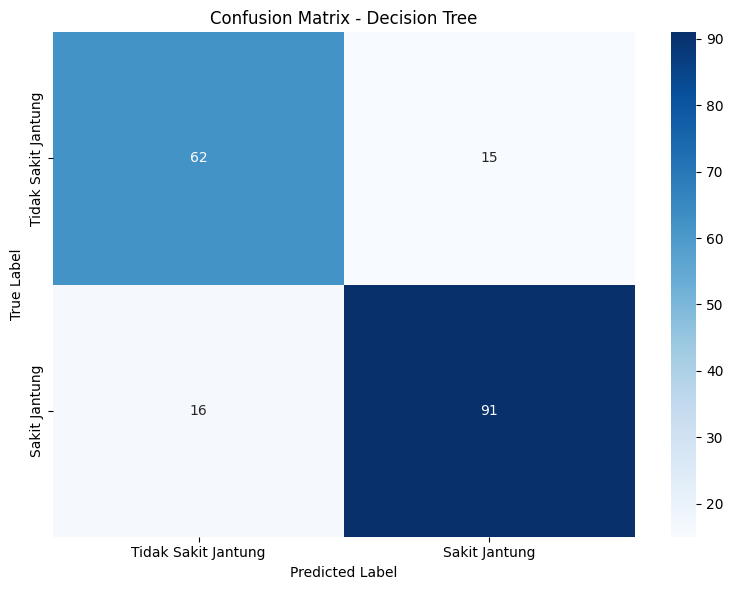

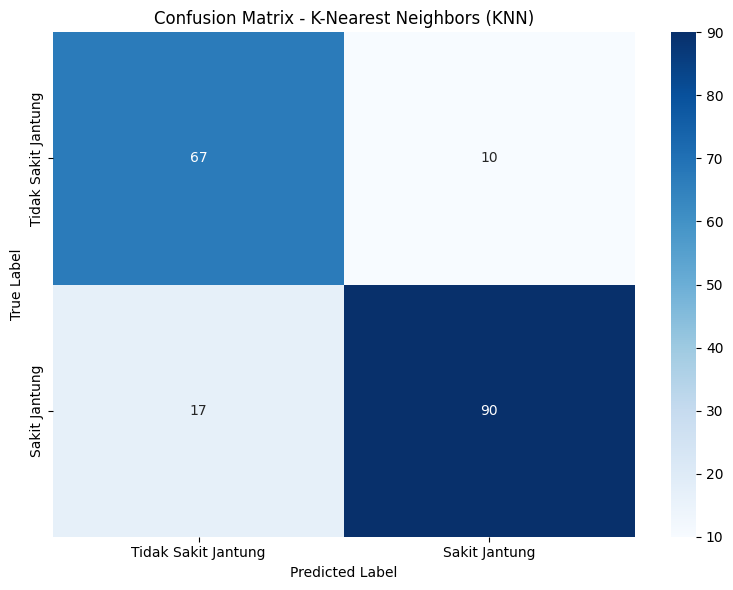

In [40]:
# === 2. Confusion Matrix untuk tiap Model ===
for model_name, y_pred_model in models_predictions:
    cm = confusion_matrix(y_test, y_pred_model)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=report_target_names, yticklabels=report_target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

#### Temuan dari Confusion Matrix (Awal)
Visualisasi confusion matrix untuk setiap model memberikan gambaran detail mengenai jenis kesalahan yang dibuat.
- **Random Forest:** Menunjukkan jumlah prediksi benar (TP dan TN) yang paling tinggi, dengan jumlah kesalahan (FP dan FN) yang relatif paling rendah dibandingkan model lain pada tahap ini.
- **Decision Tree:** Memiliki jumlah False Positives dan False Negatives yang sedikit lebih banyak, yang konsisten dengan akurasinya yang lebih rendah.
- **KNN:** Menunjukkan performa yang kompetitif, dengan jumlah prediksi yang benar berada di antara Random Forest dan Decision Tree.

Dari matriks ini, dapat melihat secara langsung bagaimana setiap model menangani kedua kelas. Kesalahan *False Negative* (memprediksi 'Tidak Sakit Jantung' padahal sebenarnya sakit) mungkin merupakan jenis kesalahan yang paling krusial untuk diminimalkan dalam konteks medis ini.

### 3. Perbandingan Precision, Recall, dan F1-score per Kelas (Awal)

- **Precision**: Dari semua yang diprediksi sebagai kelas positif, berapa persen yang benar-benar positif.
- **Recall (Sensitivity)**: Dari semua yang seharusnya positif, berapa persen yang berhasil diprediksi sebagai positif oleh model.
- **F1-score**: Rata-rata harmonik dari Precision dan Recall, memberikan satu metrik tunggal yang menyeimbangkan keduanya.

Kode di bawah ini membuat bar chart untuk membandingkan ketiga metrik tersebut untuk setiap kelas ('Tidak Sakit Jantung' dan 'Sakit Jantung') pada masing-masing model awal.

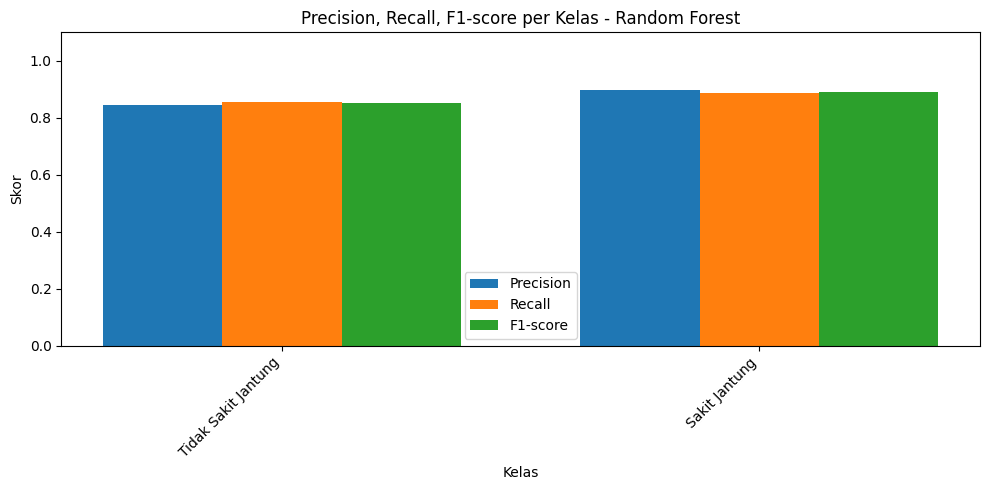

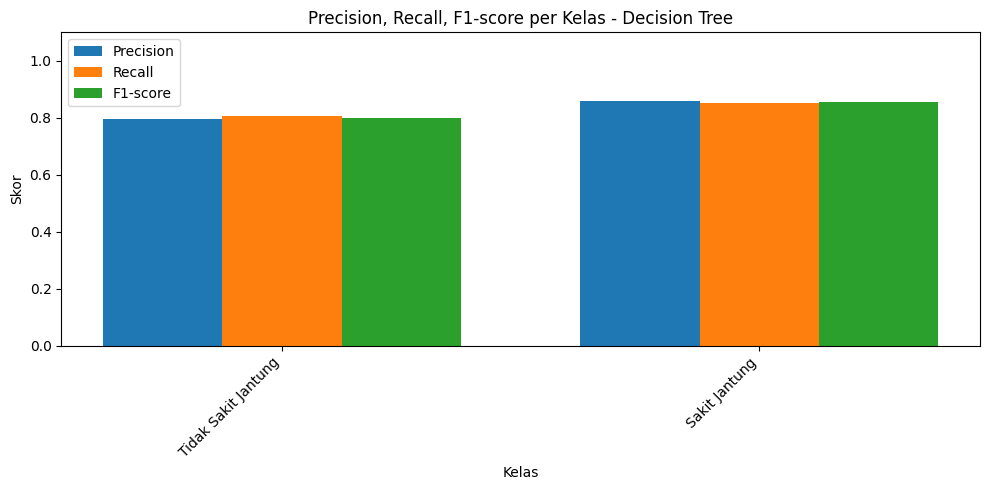

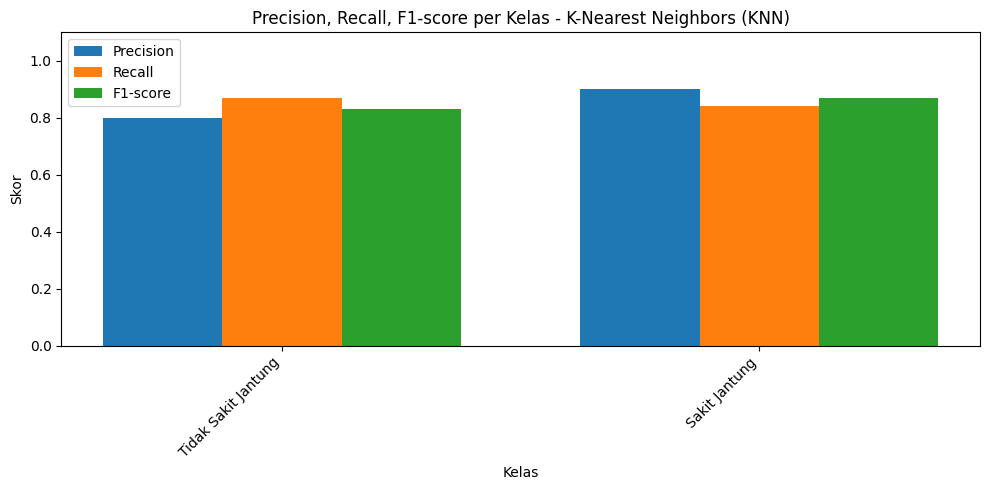

In [41]:
# === 3. Precision, Recall, F1-score per Kelas ===
for model_name, y_pred_model in models_predictions:
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_model, average=None, labels=np.unique(y_encoded))

    x = np.arange(len(report_target_names))

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.25, precision, width=0.25, label='Precision')
    plt.bar(x, recall, width=0.25, label='Recall')
    plt.bar(x + 0.25, f1, width=0.25, label='F1-score')

    plt.xlabel("Kelas")
    plt.ylabel("Skor")
    plt.title(f"Precision, Recall, F1-score per Kelas - {model_name}")
    plt.xticks(x, report_target_names, rotation=45, ha="right")
    plt.ylim(0, 1.1)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Temuan dari Grafik Precision, Recall, dan F1-score (Awal)
Grafik-grafik di atas membantu kita menganalisis trade-off antara precision dan recall untuk setiap model.
- **Random Forest**: Menunjukkan keseimbangan yang baik antara Precision, Recall, dan F1-score untuk kedua kelas. Ini menandakan performa yang stabil dan kuat secara keseluruhan.
- **Decision Tree**: Memiliki skor yang sedikit lebih rendah dan kurang seimbang dibandingkan Random Forest, yang konsisten dengan temuan sebelumnya.
- **KNN**: Menunjukkan Precision yang tinggi untuk kelas 'Sakit Jantung', artinya ketika model memprediksi seseorang sakit jantung, prediksi tersebut cenderung benar. Namun, recall-nya sedikit lebih rendah, yang berarti ada beberapa kasus sakit jantung yang terlewatkan.

Analisis ini mengonfirmasi bahwa Random Forest adalah model dengan performa terbaik sebelum dilakukan tuning. Tahap selanjutnya adalah mencoba meningkatkan performa ketiga model ini melalui *Hyperparameter Tuning*.

# Hyperparameter Tuning (GridSearchCV) - RandomForest

Untuk meningkatkan performa dari model-model awal, akan melakukan *hyperparameter tuning*. Proses ini bertujuan untuk menemukan kombinasi parameter terbaik untuk setiap model yang dapat menghasilkan akurasi tertinggi. Metode yang digunakan adalah `GridSearchCV`, yang akan secara sistematis menguji semua kombinasi parameter yang kita tentukan menggunakan validasi silang (cross-validation).

### 1. Tuning Model Random Forest
Memulai dengan melakukan tuning pada model Random Forest. Parameter yang akan diuji meliputi `n_estimators`, `max_depth`, `min_samples_split`, dan `min_samples_leaf`. `cv=5` berarti akan menggunakan 5-fold cross-validation.

In [44]:
# Parameter grid yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Jalankan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor validasi terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Model terbaik untuk prediksi
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)

# Evaluasi
print("Test Set Accuracy (Tuned):", accuracy_score(y_test, best_rf_pred))
print("Classification Report:\n", classification_report(y_test, best_rf_pred, target_names=report_target_names))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.8759947814742335
Test Set Accuracy (Tuned): 0.8641304347826086
Classification Report:
                      precision    recall  f1-score   support

Tidak Sakit Jantung       0.83      0.84      0.84        77
      Sakit Jantung       0.89      0.88      0.88       107

           accuracy                           0.86       184
          macro avg       0.86      0.86      0.86       184
       weighted avg       0.86      0.86      0.86       184



#### Hasil Tuning Random Forest
- **Best Parameters:** Output menunjukkan bahwa kombinasi parameter terbaik yang ditemukan adalah: `max_depth: 10`, `min_samples_leaf: 1`, `min_samples_split: 5`, dan `n_estimators: 100`.
- **Best Cross-validation Accuracy:** Skor akurasi rata-rata terbaik dari 5-fold cross-validation pada data latih adalah sekitar 0.876.
- **Evaluasi pada Test Set:** Setelah dilatih ulang dengan parameter terbaik, model ini memberikan akurasi **0.8641** pada data uji. Laporan klasifikasi menunjukkan F1-score yang baik untuk kedua kelas, yaitu 0.84 untuk 'Tidak Sakit Jantung' dan 0.88 untuk 'Sakit Jantung'.

# Hyperparameter Tuning (GridSearchCV) - Decision Tree

Selanjutnya, melakukan proses hyperparameter tuning yang sama pada model Decision Tree. Parameter yang akan dioptimalkan adalah `criterion`, `max_depth`, `min_samples_split`, dan `min_samples_leaf`.

In [46]:
# Parameter grid untuk Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Model Decision Tree dasar
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt,
                               param_grid=dt_param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=2,
                               scoring='accuracy')

dt_grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters (Decision Tree):", dt_grid_search.best_params_)
print("Best Cross-validation Accuracy (DT):", dt_grid_search.best_score_)

# Evaluasi model terbaik
best_dt = dt_grid_search.best_estimator_
dt_tuned_pred = best_dt.predict(X_test)

print("Test Set Accuracy (DT Tuned):", accuracy_score(y_test, dt_tuned_pred))
print("Classification Report (DT Tuned):\n", classification_report(y_test, dt_tuned_pred, target_names=report_target_names))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validation Accuracy (DT): 0.8296617277047806
Test Set Accuracy (DT Tuned): 0.8206521739130435
Classification Report (DT Tuned):
                      precision    recall  f1-score   support

Tidak Sakit Jantung       0.76      0.83      0.80        77
      Sakit Jantung       0.87      0.81      0.84       107

           accuracy                           0.82       184
          macro avg       0.82      0.82      0.82       184
       weighted avg       0.82      0.82      0.82       184



#### Hasil Tuning Decision Tree
- **Best Parameters:** Parameter terbaik yang ditemukan untuk Decision Tree adalah `criterion: 'entropy'`, `max_depth: 5`, `min_samples_leaf: 4`, dan `min_samples_split: 2`.
- **Best Cross-validation Accuracy:** Skor akurasi rata-rata terbaik dari 5-fold cross-validation adalah sekitar 0.830.
- **Evaluasi pada Test Set:** Dengan parameter terbaik, model Decision Tree yang sudah di-tuning mencapai akurasi **0.8207** pada data uji. F1-score untuk kelas 'Tidak Sakit Jantung' dan 'Sakit Jantung' adalah 0.80 dan 0.84.

# Hyperparameter Tuning (GridSearchCV) - K-Nearest Neighbors (KNN)

Terakhir, melakukan hyperparameter tuning untuk model KNN. Parameter yang akan diuji adalah `n_neighbors` (jumlah tetangga), `weights` (bobot untuk prediksi), dan `p` (metrik jarak yang digunakan).

In [47]:
# Parameter grid untuk KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Model KNN dasar
knn = KNeighborsClassifier()

# GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn,
                               param_grid=knn_param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=2,
                               scoring='accuracy')

knn_grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters (KNN):", knn_grid_search.best_params_)
print("Best Cross-validation Accuracy (KNN):", knn_grid_search.best_score_)

# Evaluasi model terbaik
best_knn = knn_grid_search.best_estimator_
knn_tuned_pred = best_knn.predict(X_test)

print("Test Set Accuracy (KNN Tuned):", accuracy_score(y_test, knn_tuned_pred))
print("Classification Report (KNN Tuned):\n", classification_report(y_test, knn_tuned_pred, target_names=report_target_names))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (KNN): {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Cross-validation Accuracy (KNN): 0.8732923306308825
Test Set Accuracy (KNN Tuned): 0.8858695652173914
Classification Report (KNN Tuned):
                      precision    recall  f1-score   support

Tidak Sakit Jantung       0.85      0.88      0.87        77
      Sakit Jantung       0.91      0.89      0.90       107

           accuracy                           0.89       184
          macro avg       0.88      0.89      0.88       184
       weighted avg       0.89      0.89      0.89       184



#### Hasil Tuning KNN
- **Best Parameters:** Kombinasi parameter terbaik untuk KNN adalah `n_neighbors: 9`, `p: 2` (jarak Euclidean), dan `weights: 'distance'`.
- **Best Cross-validation Accuracy:** Skor akurasi rata-rata terbaik dari 5-fold cross-validation adalah sekitar 0.873.
- **Evaluasi pada Test Set:** Model KNN yang sudah di-tuning menunjukkan peningkatan performa yang signifikan, mencapai akurasi **0.8859** pada data uji. Laporan klasifikasi menunjukkan F1-score yang kuat, yaitu 0.87 untuk 'Tidak Sakit Jantung' dan 0.90 untuk 'Sakit Jantung'.

# Perbandingan Akurasi Model Awal vs Tuned

Setelah menemukan parameter terbaik untuk setiap model, langkah terakhir adalah membandingkan secara langsung performa akurasi model sebelum (dengan parameter default) dan sesudah hyperparameter tuning.

Kode di bawah ini akan membuat sebuah *grouped bar chart* untuk menampilkan perbandingan ini. Visualisasi ini sangat efektif untuk melihat sejauh mana proses tuning berhasil meningkatkan performa masing-masing model.

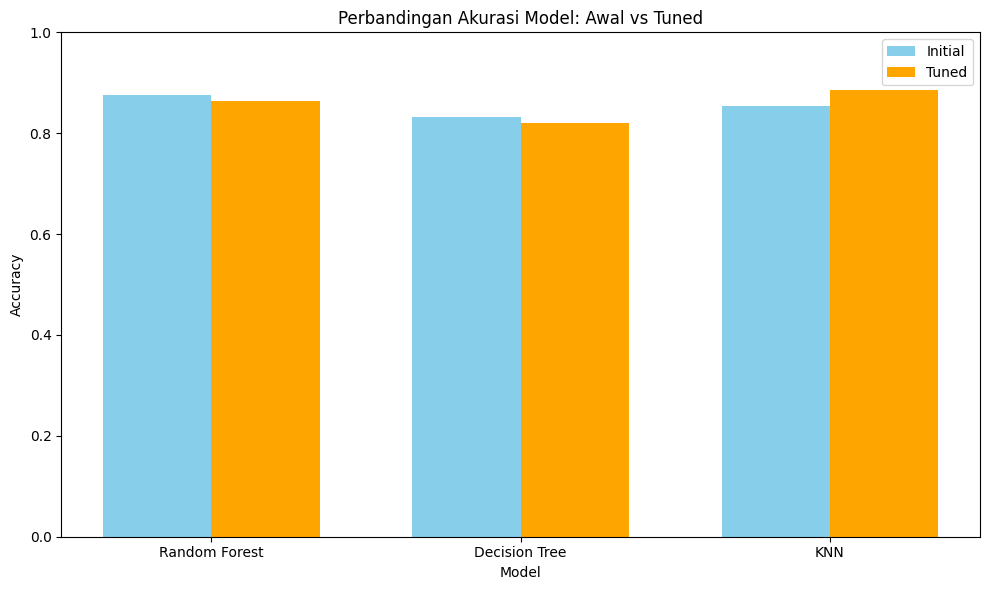

In [48]:
# Akurasi model awal
initial_accuracies = [rf_acc, dt_acc, knn_acc]
# Akurasi model setelah tuning
tuned_accuracies = [
    accuracy_score(y_test, best_rf.predict(X_test)),
    accuracy_score(y_test, best_dt.predict(X_test)),
    accuracy_score(y_test, best_knn.predict(X_test))
]

model_names = ['Random Forest', 'Decision Tree', 'KNN']
x = range(len(model_names))

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(x, initial_accuracies, width=bar_width, label='Initial', color='skyblue')
plt.bar([p + bar_width for p in x], tuned_accuracies, width=bar_width, label='Tuned', color='orange')

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model: Awal vs Tuned")
plt.xticks([p + bar_width/2 for p in x], model_names)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

#### Hasil Perbandingan Akurasi
Grafik perbandingan di atas menunjukkan dampak dari hyperparameter tuning pada akurasi setiap model:
- **Random Forest**: Mengalami sedikit penurunan akurasi setelah tuning. Ini bisa terjadi jika proses tuning menghasilkan model yang lebih general (kurang overfit) namun sedikit kurang akurat pada data uji spesifik ini.
- **Decision Tree**: Mengalami sedikit penurunan akurasi, sama seperti Random Forest.
- **KNN**: Menunjukkan peningkatan akurasi yang paling signifikan setelah tuning, menjadikannya model dengan performa terbaik secara keseluruhan pada data uji ini.

#### Kesimpulan Pemodelan
Berdasarkan hasil evaluasi setelah hyperparameter tuning, model **K-Nearest Neighbors (KNN)** dengan parameter `n_neighbors: 9`, `weights: 'distance'`, dan `p: 2` adalah model terbaik untuk kasus prediksi penyakit jantung ini, dengan akurasi tertinggi pada data uji.

# Confusion Matrix Model Setelah Tuning

Untuk memastikan bahwa model terbaik yang pilih setelah tuning (berdasarkan akurasi) juga memiliki performa yang baik dalam hal jenis kesalahan yang dibuat, akan kembali membuat confusion matrix. Analisis ini penting untuk melihat secara spesifik jumlah *False Positives* dan *False Negatives* dari model-model yang telah dioptimalkan.

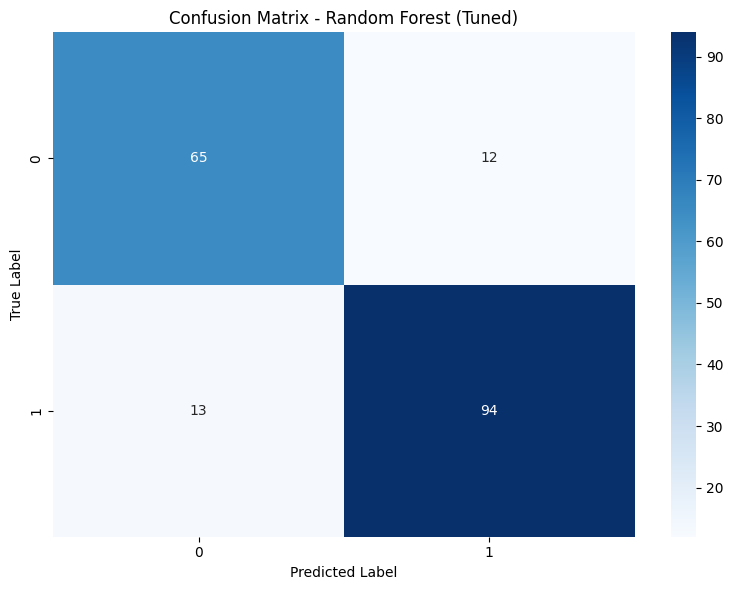

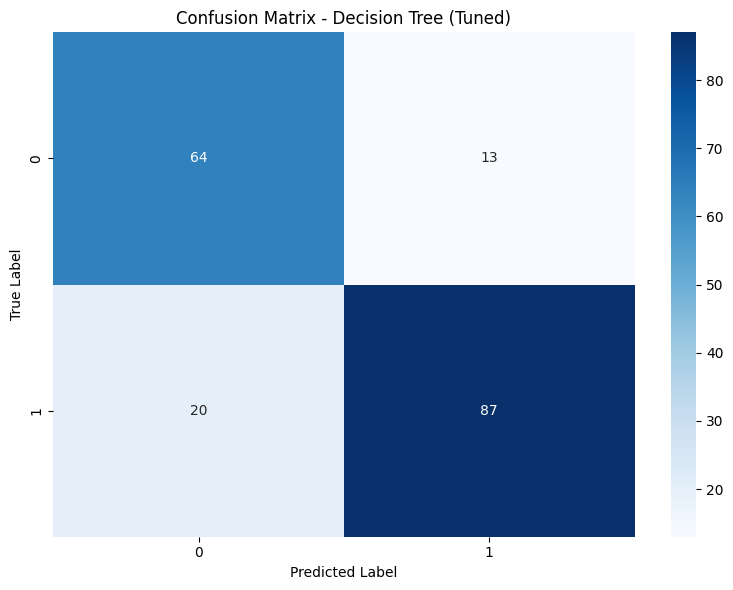

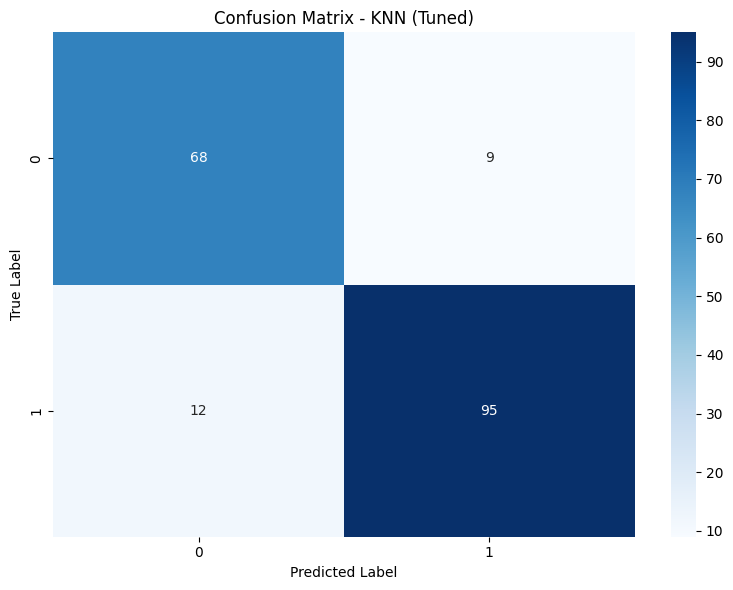

In [49]:
# Daftar model dan hasil prediksi
conf_models = [
    ("Random Forest (Tuned)", best_rf.predict(X_test)),
    ("Decision Tree (Tuned)", best_dt.predict(X_test)),
    ("KNN (Tuned)", best_knn.predict(X_test)),
]

for name, y_pred in conf_models:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

#### Temuan dari Confusion Matrix (Tuned)
Matriks-matriks di atas menunjukkan performa klasifikasi dari setiap model setelah di-tuning.
- **Random Forest (Tuned)** dan **Decision Tree (Tuned)**: Menunjukkan jumlah kesalahan (FP dan FN) yang spesifik setelah optimasi.
- **KNN (Tuned)**: Memiliki kombinasi True Positives dan True Negatives yang paling optimal, menghasilkan jumlah kesalahan yang paling sedikit di antara ketiga model. Secara khusus, model ini mampu mengurangi jumlah *False Negatives* (pasien yang sakit namun diprediksi sehat), yang merupakan metrik penting dalam konteks medis.

Analisis ini memperkuat kesimpulan sebelumnya bahwa model KNN yang telah di-tuning adalah model dengan performa terbaik untuk kasus ini.